## Question 1. a

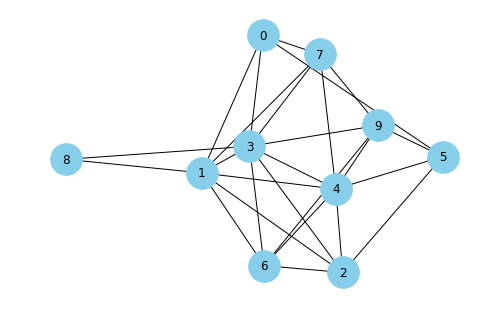

In [33]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def erdos_renyi_model(n,p):
    graph = nx.Graph()
    nodes = list(i for i in range(0,n))
    for node in nodes:
        graph.add_node(node)
        for n in nodes:
            rand = random.uniform(0, 1)
            if (rand <= p) and (node > n):
                graph.add_edge(node, n)
    return graph

# graph = erdos_renyi_model(10,0.5)
# nx.draw(graph, with_labels=True, node_size=1000, node_color="skyblue")
# plt.show()
          

## Question 1. b

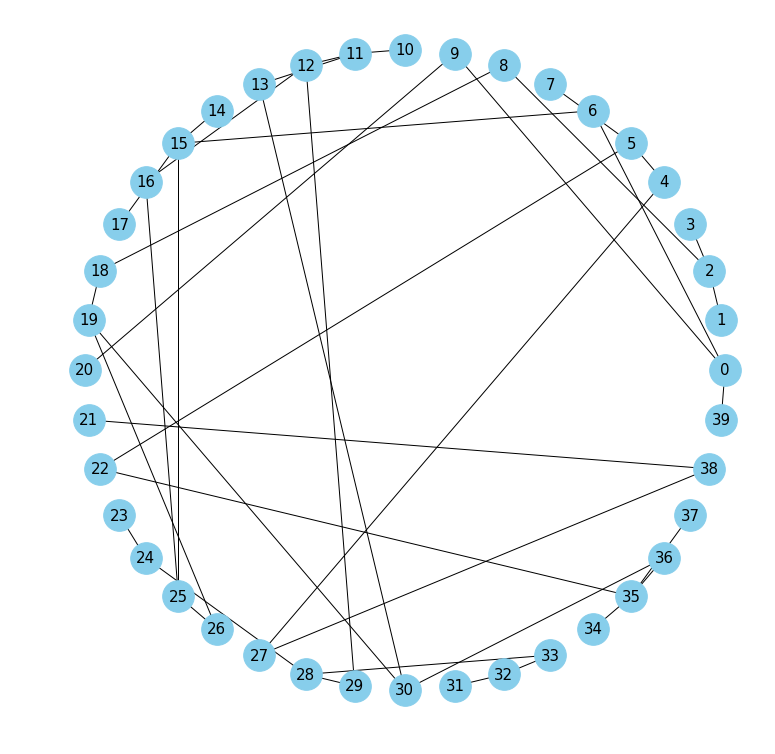

In [ ]:
def small_world_model(n,k,p):
    G = nx.Graph()
    nodes = list(i for i in range(0,n))
    for node in nodes:
        G.add_node(node)
        for i in range(0, int(k/2+1)):
            G.add_edge(node, (node+i)%n)
            G.add_edge(node, (node-i)%n)
    edges = G.edges()
    for edge in list(edges):
        if (edge[0] < edge[1]):
            rand = random.uniform(0, 1)
            if rand <= p:
                G.remove_edge(edge[0], edge[1])
                new_node = random.randint(0,n)
                G.add_edge(edge[0], new_node)
    return G

# G = small_world_model(40,2,0.6)
# plt.figure(3,figsize=(10,10))
# pos = nx.circular_layout(G)
# nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=15)
# plt.show()
    

## Question 1. c

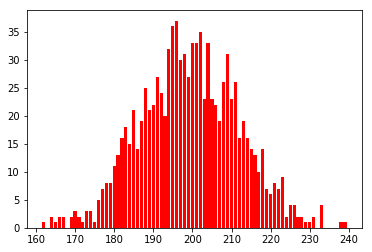

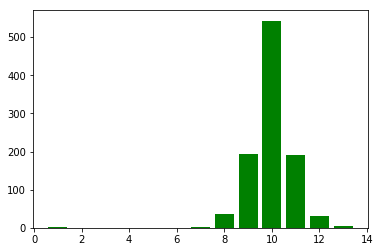

Erdos Renyi graph diameter is:  2
Erdos Renyi graph clustering coefficient is: 

In [ ]:
def node_clustering_coefficient(G,node):
    neighbors = G.neighbors(node)
    neighbors = list(neighbors)
    edges_between_neighbors = 0
    clustering_coefficient = 0
    # count edges between neighbors
    edges = G.edges()
    for edge in list(edges):
        if (edge[0] in neighbors and edge[1] in neighbors):
            edges_between_neighbors += 1
    degree = G.degree(node)
    if (degree <= 1):
        return clustering_coefficient
    # From lecture: Ci = 2 * (num of edges between the neighbors)/ ki *(ki – 1)
    clustering_coefficient = (2 * (float(edges_between_neighbors)))/(degree*(degree-1))
    return clustering_coefficient
            
    
def graph_clustering_coefficient(G):
    sum_clustering_coefficient = 0
    for node in G.nodes():
        sum_clustering_coefficient += node_clustering_coefficient(G,node)
    return sum_clustering_coefficient/G.number_of_nodes()

def calculate_diameter(G):
    diameter = 0
    if not nx.is_connected(G):
        sub_graphs = [G.subgraph(x) for x in nx.connected_components(G)]
        for component in sub_graphs:
            diameter = max(nx.algorithms.distance_measures.diameter(component), diameter)
    else:
        diameter = nx.algorithms.distance_measures.diameter(G)
    return diameter

erdos_renyi_g = erdos_renyi_model(1000, 0.2)
small_world_g = small_world_model(1000, 8, 0.1)

degree_dist_er = {}
avg_degree_er = 0
for node in erdos_renyi_g.nodes():
    node_degree = erdos_renyi_g.degree(node)
    if node_degree not in degree_dist_er:
        degree_dist_er[node_degree] = 0
    degree_dist_er[node_degree] += 1
    avg_degree_er += node_degree
#avg_degree_er = avg_degree_er/1000

plt.bar(list(degree_dist_er.keys()), degree_dist_er.values(), color='r')
plt.show()

degree_dist_sm = {}
avg_degree_sm = 0
for node in small_world_g.nodes():
    node_degree = small_world_g.degree(node)
    if node_degree not in degree_dist_sm:
        degree_dist_sm[node_degree] = 0
    degree_dist_sm[node_degree] += 1
    avg_degree_sm += node_degree
#avg_degree_sm = avg_degree_sm/N


plt.bar(list(degree_dist_sm.keys()), degree_dist_sm.values(), color='g')
plt.show()

print "Erdos Renyi graph diameter is: ", calculate_diameter(erdos_renyi_g)
print "Erdos Renyi graph clustering coefficient is: ", graph_clustering_coefficient(erdos_renyi_g)
print "Small world graph diameter is: ", calculate_diameter(small_world_g)
print "Small world graph clustering coefficient is:", graph_clustering_coefficient(small_world_g)


## Question 2 . a

In [ ]:
import networkx as nx

In [ ]:
def degree_centrality(G):
    return dict(G.degree(list(G.nodes())))
    


def betweenness_centrality(G):
    result = {}
    for n in G.nodes():
        result[n] = 0
    for source in G.nodes():
        for target in G.nodes():
            if (source!=target):
                try:
                    for p in nx.all_shortest_paths(G,source=source,target=target):
                        for node in p[1:len(p)-1]:
                            result[node] += 1     
                except:
                    continue
    return result
                
    
def closeness_centrality(G):
    result = {}
    sumOfDistance = 0
    for n in G.nodes:
        result[n] = 0
    for source in G.nodes():
        sumOfDistance = 0 
        for target in G.nodes():
            if (target != source):
                try:
                    sumOfDistance += len(nx.shortest_path(G, source, target)) - 1
                except:
                    continue
            if (sumOfDistance > 0):
                result[source] = 1/sumOfDistance
    return result

## QUESTION 2 . b

In [ ]:
G = nx.florentine_families_graph()
nx.draw(G, with_labels = True)
sorted_degree = sorted(degree_centrality(G).items(), key=lambda x: x[1])
top5_degree = sorted_degree[-5:]
print(top5_degree)

sorted_betweenness = sorted(betweenness_centrality(G).items(), key=lambda x: x[1])
top5_betweenness = sorted_betweenness[-5:]
print(top5_betweenness)

sorted_closeness = sorted(closeness_centrality(G).items(), key=lambda x: x[1])
top5_closeness = sorted_closeness[-5:]
print(top5_closeness)



## Question 2. c

In [ ]:
G = nx.florentine_families_graph()
d = degree_centrality(G)
nx.draw(G, with_labels = True, nodelist = d.keys(), node_size = [v * 500 for v in d.values()])



In [ ]:
G = nx.florentine_families_graph()
d = betweenness_centrality(G)
nx.draw(G, with_labels = True, nodelist = d.keys(), node_size = [v * 10 for v in d.values()] )


In [ ]:
G = nx.florentine_families_graph()
d = closeness_centrality(G)
print(d)
nx.draw(G, with_labels = True, nodelist = d.keys(), node_size = [v * 50000 for v in d.values()] )


# Question 3. b. i. + c

In [ ]:
import random
import matplotlib.pyplot as plt


In [ ]:
def createErdosGraph(percentage):
    n = 30
    p = 0.5
    Graph = nx.erdos_renyi_graph(n, p)
    G = nx.empty_graph(n)
    for edge in Graph.edges():
        x = random.random()
        if (x<=percentage):
            G.add_edge(*edge, label = "+")
        else:
            G.add_edge(*edge, label = "-")
    return G

def displayGraph(G):
    pos = nx.circular_layout(G)  # positions for all nodes
    #pos = nx.spring_layout(G)
    plt.figure(2,figsize=(15,15)) 
    elarge = [(u,v) for (u,v,d) in G.edges(data=True) if d['label'] =='+'] # solid edge
    esmall = [(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == '-'] # dashed edge

    # Draw nodes
    nx.draw_networkx_nodes(G,pos,node_size=100, node_color='orange')

    # Draw edges
    nx.draw_networkx_edges(G,pos,edgelist=elarge, width=2, edge_color='g')
    nx.draw_networkx_edges(G,pos,edgelist=esmall, width=3,
                           alpha=0.5,edge_color='b', arrows=False,style='dashed')

    # Draw node labels
    nx.draw_networkx_labels(G,pos,font_size=10,font_family='sans-serif')

    # Draw edge labels
    edge_labels =dict([((u, v), d['label']) for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.axis('off')
    plt.show() # display 

In [ ]:
displayGraph(createErdosGraph(0.9))

In [ ]:
displayGraph(createErdosGraph(0.5))

In [ ]:
def checkBalance(G):
    displayGraph(G)
    graphNoMinus = nx.empty_graph(len(G))
    for edge in G.edges(data=True):
        if edge[2]['label'] == '+':
            graphNoMinus.add_edge(edge[0], edge[1], label = "+")
    connectedCom = [x for x in sorted(nx.connected_components(graphNoMinus), key=len, reverse=True)]
    superGraph = nx.empty_graph(len(connectedCom))
    superNode1 = 0
    superNode2 = 0
    for edge in G.edges(data=True):
        if edge[2]['label'] == '-':
            for i in range (0, len(connectedCom)):
                if edge[0] in connectedCom[i]:
                    superNode1 = i
                    if edge[1] in connectedCom[i]:
                        print("bad edge: ", edge)
                        return False
                if edge[1] in connectedCom[i]:
                    superNode2 = i
            superGraph.add_edge(superNode1, superNode2, label = "-")    
    for cycle in nx.cycle_basis(superGraph):
        if (len(cycle)%2 == 1):
            displayGraph(superGraph)
            print("there is an odd length cycle in the grap. the cycle: ", cycle)
            return False
    print("SuperGraph: ")
    displayGraph(superGraph)
    return True




In [ ]:
G = createErdosGraph(0.9)
checkBalance(G)


In [ ]:
G = createErdosGraph(0.5)
checkBalance(G)


## Question 3. d

In [ ]:
%matplotlib inline

G = nx.Graph()
G.add_node("Luke")
G.add_node("Jeri")
G.add_node("Matt")
G.add_node("Karen")
G.add_node("Foggy")
G.add_node("Fisk")
G.add_node("Danny")
G.add_node("Maddam Gao")
G.add_node("Jessica")
G.add_node("Trish")
G.add_node("Frank")
G.add_node("Clair")
G.add_node("Kilgrave")

G.add_edge("Luke", "Jessica", label = "+")
G.add_edge("Jeri", "Jessica", label = "+")
G.add_edge("Luke", "Clair", label = "+")
G.add_edge("Danny", "Jessica", label = "+")
G.add_edge("Matt", "Karen", label = "+")
G.add_edge("Matt", "Foggy", label = "+")
G.add_edge("Foggy", "Karen", label = "+")
G.add_edge("Trish", "Jessica", label = "+")
G.add_edge("Trish", "Danny", label = "-")
G.add_edge("Trish", "Kilgrave", label = "-")
G.add_edge("Jessica", "Kilgrave", label = "-")
G.add_edge("Luke", "Kilgrave", label = "-")
G.add_edge("Luke", "Matt", label = "+")
G.add_edge("Luke", "Clair", label = "+")
G.add_edge("Matt", "Clair", label = "+")
G.add_edge("Matt", "Fisk", label = "-")
G.add_edge("Danny", "Clair", label = "+")
G.add_edge("Danny", "Maddam Gao", label = "+")

def displayMarvelGraph(G):
    #pos = nx.circular_layout(G)  # positions for all nodes
    pos = nx.spring_layout(G)
    plt.figure(2,figsize=(15,15)) 
    elarge = [(u,v) for (u,v,d) in G.edges(data=True) if d['label'] =='+'] # solid edge
    esmall = [(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == '-'] # dashed edge

    # Draw nodes
    nx.draw_networkx_nodes(G,pos,node_size=1500, node_color='orange')

    # Draw edges
    nx.draw_networkx_edges(G,pos,edgelist=elarge, width=2, edge_color='g')
    nx.draw_networkx_edges(G,pos,edgelist=esmall, width=3,
                           alpha=0.5,edge_color='b', arrows=False,style='dashed')

    # Draw node labels
    nx.draw_networkx_labels(G,pos,font_size=10,font_family='sans-serif')

    # Draw edge labels
    edge_labels =dict([((u, v), d['label']) for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.axis('off')
    plt.show() # display 

displayMarvelGraph(G)